In [1]:
import networkx as nx
import time
import timeit
import numpy as np
import matplotlib.pyplot as plt

from file_utils import read_lines_tsv

In [2]:
# Loading dataset from file
    # source: https://graphchallenge.mit.edu/data-sets
    # file_source: https://graphchallenge.s3.amazonaws.com/snap/roadNet-CA/roadNet-CA_adj.tsv
    # file_format: Adjacency TSV (Tab-Separated Values)
        # <dataset-name>_adj.tsv
        # (Row, Col, Value) tuple describing the adjacency matrix of the graph in tab separated format.
        # Adjacency matrix is of size Num_vertices x Num_vertices
    # file: roadNet-CA_adj.tsv (Road network of California)
    # num of nodes:     1.965.206
    # num of edges:     5.533.214
    # num of triangles:   120.676
    
start = timeit.default_timer()
    
G = nx.read_edgelist('../datasets/roadNet-CA_adj.tsv', data=(('ajd_value',float),))
print(nx.info(G))

end = timeit.default_timer()
print ('elapsed time: %f' % (end - start))

Name: 
Type: Graph
Number of nodes: 1965206
Number of edges: 2766607
Average degree:   2.8156
elapsed time: 86.938774


In [2]:
# Alternative way to build graphs from file
# This will allow to generate random samples of graphs from a list of edges in memory

start = timeit.default_timer()
lines = read_lines_tsv('../datasets/roadNet-CA_adj.tsv')
end = timeit.default_timer()
print ('elapsed time to read file: %f' % (end - start))

start = timeit.default_timer()
G = nx.parse_edgelist(lines, nodetype = int, data=(('ajd_value',float),))
end = timeit.default_timer()
print ('elapsed time to build graph in memory: %f' % (end - start))

start = timeit.default_timer()
print(nx.info(G))
end = timeit.default_timer()
print ('elapsed time to print info: %f' % (end - start))

start = timeit.default_timer()
print(('Number of lines: %s') % len(lines))
end = timeit.default_timer()
print ('elapsed time to calculate length of list in memory: %f' % (end - start))

elapsed time to read file: 3.917263
elapsed time to build graph in memory: 83.453853
Name: 
Type: Graph
Number of nodes: 1965206
Number of edges: 2766607
Average degree:   2.8156
elapsed time to print info: 12.796999
Number of lines: 5533214
elapsed time to calculate length of list in memory: 0.000122


In [4]:
start = timeit.default_timer()
print('Number of nodes: ', G.number_of_nodes())
end = timeit.default_timer()
print ('elapsed time: %f' % (end - start))

start = timeit.default_timer()
print('Number of edges: ', G.number_of_edges())
end = timeit.default_timer()
print ('elapsed time: %f' % (end - start))

start = timeit.default_timer()
# each triangle is counted 3 times then divided by 3
print('Number of triangles: ', int(sum(list(nx.triangles(G).values()))/3))
end = timeit.default_timer()
print ('elapsed time: %f' % (end - start))

start = timeit.default_timer()
# clustering coefficient of G
cc = nx.average_clustering(G)
print('Clustering coefficient of G: ', cc)
end = timeit.default_timer()
print ('elapsed time: %f' % (end - start))

Number of nodes:  1965206
elapsed time: 0.000666
Number of edges:  2766607
elapsed time: 1.594899
Number of triangles:  120676
elapsed time: 64.171292
Clustering coefficient of G:  0.04637027007475698
elapsed time: 63.512121


In [5]:
# Using samples to build graphs and to calculate 

m, ccGraph, ccSample = [], [], []

for i in range(220000, len(lines)+1, 220000):
    start = timeit.default_timer()
    G.clear()
    sample = np.random.choice(lines, i, replace=False)
    G = nx.parse_edgelist(sample, nodetype = int, data=(('ajd_value',float),))
    m.append(i)
    ccGraph.append(cc)
    ccSample.append(nx.average_clustering(G))
    end = timeit.default_timer()
    print('Elapsed time for %d lines: %f' % (i, (end-start)) )

Elapsed time for 220000 lines: 26.174857
Elapsed time for 440000 lines: 27.696836
Elapsed time for 660000 lines: 38.495607
Elapsed time for 880000 lines: 48.023648
Elapsed time for 1100000 lines: 57.412189
Elapsed time for 1320000 lines: 66.579704
Elapsed time for 1540000 lines: 76.891464
Elapsed time for 1760000 lines: 94.828853
Elapsed time for 1980000 lines: 107.530873
Elapsed time for 2200000 lines: 118.523539
Elapsed time for 2420000 lines: 167.157511
Elapsed time for 2640000 lines: 137.856529
Elapsed time for 2860000 lines: 229.864025
Elapsed time for 3080000 lines: 183.785370
Elapsed time for 3300000 lines: 785.808988
Elapsed time for 3520000 lines: 803.456922
Elapsed time for 3740000 lines: 389.326330
Elapsed time for 3960000 lines: 958.693468
Elapsed time for 4180000 lines: 954.595436
Elapsed time for 4400000 lines: 642.027064
Elapsed time for 4620000 lines: 1604.563395
Elapsed time for 4840000 lines: 566.368215
Elapsed time for 5060000 lines: 1673.961632
Elapsed time for 5280

Text(0,0.5,'Clustering coefficient')

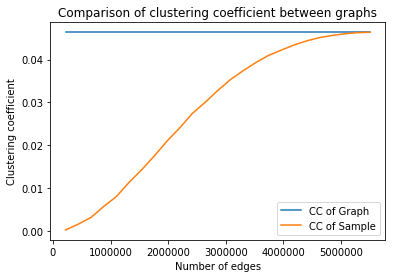

In [6]:
# 11209 minutes
plt.plot(m, ccGraph, label='CC of Graph')
plt.plot(m, ccSample, label='CC of Sample')
plt.legend()
plt.title('Comparison of clustering coefficient between graphs')
plt.xlabel('Number of edges')
plt.ylabel('Clustering coefficient')